In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D

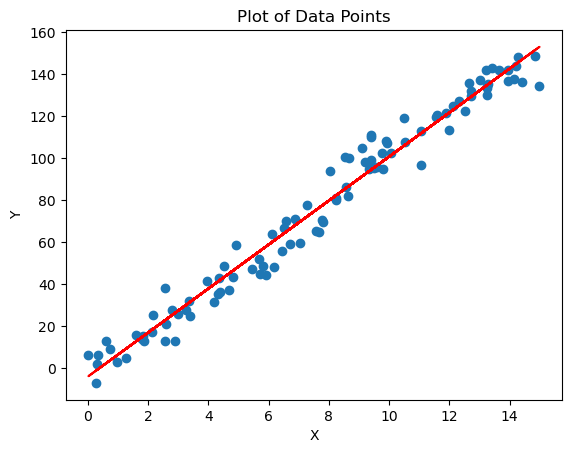

Value of Theta 0: -3.8469939446510466
Value of Theta 1: 10.45946871880033


In [46]:
df = pd.read_csv("lin_df.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df['X'].to_numpy()
Y = df['Y'].to_numpy()
m = (np.mean(X*Y)-np.mean(X)*np.mean(Y))/(np.mean(X*X)-np.mean(X)*np.mean(X))
b = np.mean(Y) - m*np.mean(X)
best_fit = m*X + b
plt.plot(X, best_fit, color='red', label='Best fit line')
plt.scatter(df['X'], df['Y'])
plt.title('Plot of Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
print(f'Value of Theta 0: {b}')
print(f'Value of Theta 1: {m}')

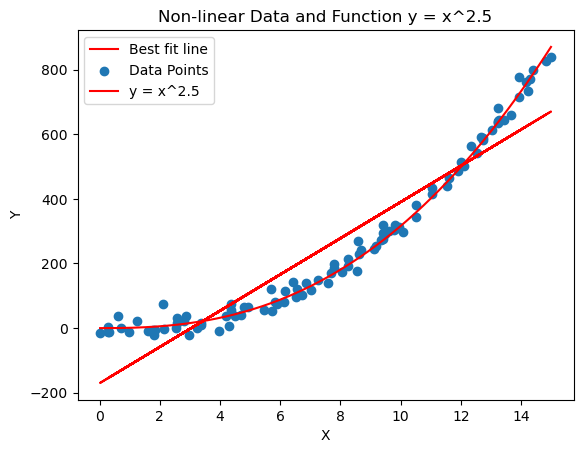

In [47]:
df = pd.read_csv('nonlin_df.csv') 
X = df['X'].to_numpy()
Y = df['Y'].to_numpy()
m = (np.mean(X*Y)-np.mean(X)*np.mean(Y))/(np.mean(X*X)-np.mean(X)*np.mean(X))
b = np.mean(Y) - m*np.mean(X)
best_fit = m*X + b
plt.plot(X, best_fit, color='red', label='Best fit line')
plt.scatter(df['X'], df['Y'], label='Data Points')

X_plot = np.linspace(df['X'].min(), df['X'].max(), 400)

Y_plot = X_plot**2.5

plt.plot(X_plot, Y_plot, color='red', label='y = x^2.5')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Data and Function y = x^2.5')
plt.legend()

plt.show()

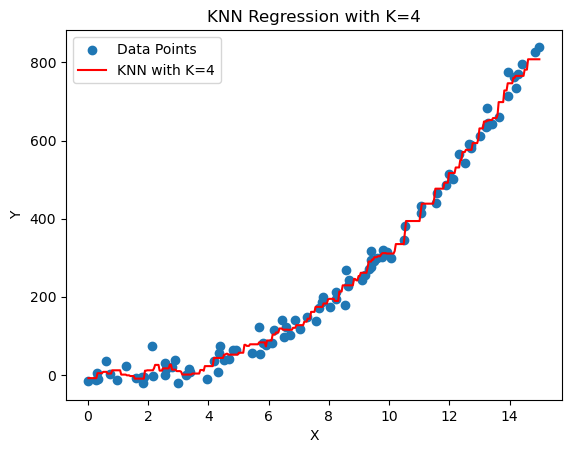

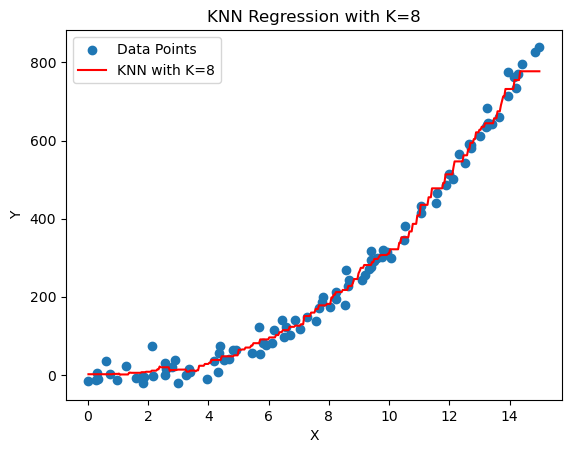

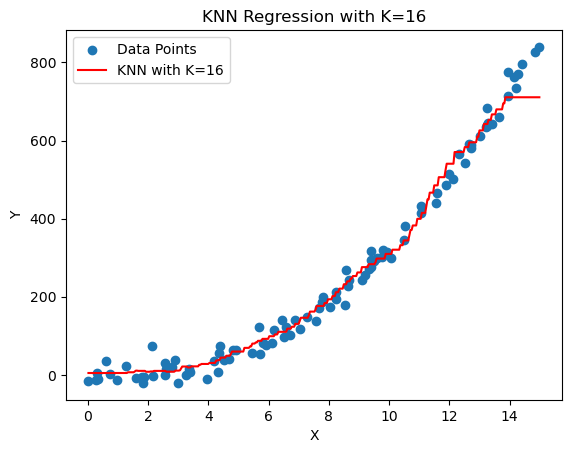

In [48]:
df = pd.read_csv('nonlin_df.csv')

def knn_predict(X_train, Y_train, X_test, k):
    predictions = []
    for x_test in X_test:
        dists = distance.cdist(X_train.reshape(-1, 1), np.array([x_test]).reshape(-1, 1), 'euclidean').flatten()
        nearest_indices = np.argsort(dists)[:k]
        predictions.append(np.mean(Y_train[nearest_indices]))
    return np.array(predictions)

X_train = df['X'].to_numpy()
Y_train = df['Y'].to_numpy()
X_test = np.linspace(X_train.min(), X_train.max(), 400)

for k in [4, 8, 16]:
    Y_pred = knn_predict(X_train, Y_train, X_test, k)
    plt.figure()
    plt.scatter(X_train, Y_train, label='Data Points')
    plt.plot(X_test, Y_pred, label=f'KNN with K={k}', color='red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'KNN Regression with K={k}')
    plt.legend()
    plt.show()

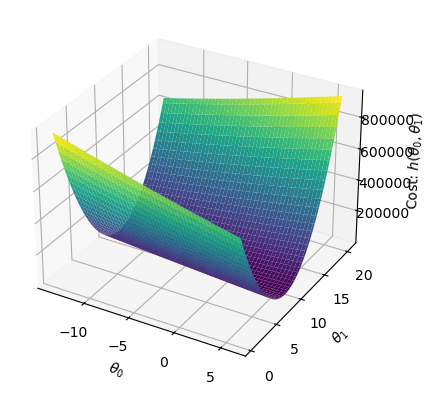

In [49]:
df = pd.read_csv("lin_df.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
X = df['X'].to_numpy()
Y = df['Y'].to_numpy()
theta0_opt = -3.8469939446510466
theta1_opt = 10.45946871880033
theta0_range = np.linspace(theta0_opt - 10, theta0_opt + 10, 100)
theta1_range = np.linspace(theta1_opt - 10, theta1_opt + 10, 100)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

H = np.zeros_like(Theta0)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        t0 = Theta0[i, j]
        t1 = Theta1[i, j]
        H[i, j] = np.sum((Y - (t0 + t1 * X))**2)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta0, Theta1, H, cmap='viridis')

ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('Cost: $h(\\theta_0,\\theta_1)$')
plt.show()

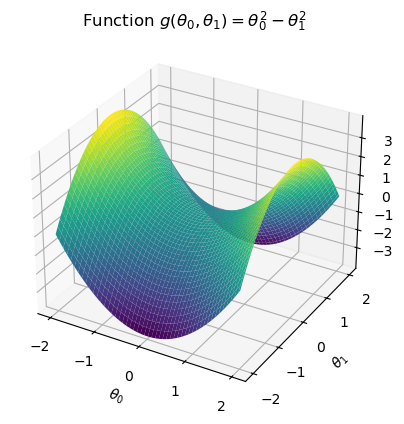

In [50]:
theta0_range = np.linspace(-2, 2, 100)
theta1_range = np.linspace(-2, 2, 100)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)

G = Theta0**2 - Theta1**2  # g(θ0, θ1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta0, Theta1, G, cmap='viridis', edgecolor='none')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$g(\\theta_0,\\theta_1)$')
ax.set_title('Function $g(\\theta_0,\\theta_1) = \\theta_0^2 - \\theta_1^2$')

plt.show()